# SVM with sklearn #

This notebook creates a support vector machine for each monk. The best combination of hyperparameters is selected performing a grid search. Below there is a brief account about the implementation of each monk's support vector machine; for each monk dataset we built three different support vectore machines (with polynomial, linear and rbf kernels) and during the model selection we selected the best one that uses the best set of hyperparameters.


## Monk1 ##

Hyperparameters considered for the grid search:

* SVM with rbf kernel
    1. C 
    2. Gamma


* SVM with linear kernel
    1. C


* SVM with polynomial kernel
    1. C
    2. Gamma
    3. Degree
    
Model selection performed choosing the model with the best tuple of hyperparameters.

## Monk2 ##

Hyperparameters considered for the grid search:

* SVM with rbf kernel
    1. C 
    2. Gamma


* SVM with linear kernel
    1. C


* SVM with polynomial kernel
    1. C
    2. Gamma
    3. Degree

Model selection performed choosing the model with the best tuple of hyperparameters.

## Monk3 ##

Hyperparameters considered for the grid search:

* SVM with rbf kernel
    1. C 
    2. Gamma


* SVM with linear kernel
    1. C


* SVM with polynomial kernel
    1. C
    2. Gamma
    3. Degree

Model selection performed choosing the model with the best tuple of hyperparameters.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import loadtxt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

import joblib

## Monk 1

### Importing datasets

In [2]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./dataset/monk1/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./dataset/monk1/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)

In [3]:
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values

### Performing one-hot encoding

In [4]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk1_tr)
x_monk1_tr = one_hot_encoder_tr.transform(x_monk1_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk1_ts)
x_monk1_ts = one_hot_encoder_ts.transform(x_monk1_ts)

### Grid search

#### RBF kernel
For the SVM with an RBF kernel, the hyperparameters we can work on are *C* and *gamma*.

In [5]:
C_range = np.logspace(-2, 5, 30, base = 2)
gamma_range = np.logspace(-9, 3, 30, base = 2)

param_grid = [{'C': C_range, 'gamma': gamma_range},
              {'C': C_range, 'gamma': ['auto', 'scale']}]

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'rbf'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 27.06995697937494, 'gamma': 0.08129499502225035} with a score of 0.93158


In [6]:
rbf_classifier = grid.best_estimator_

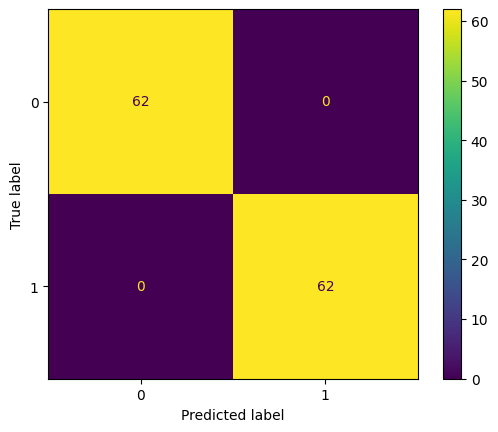

In [7]:
predictions = rbf_classifier.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Linear kernel
For the SVM with an linear kernel, the hyperparameter we can work on is *C*.

In [9]:
C_range = np.logspace(-2, 10, 100, base = 2)
gamma_range = np.logspace(-9, 3, 30, base = 2)

param_grid = dict(
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'linear'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 42.047245672296846} with a score of 0.78421


In [10]:
linear_classifier = grid.best_estimator_

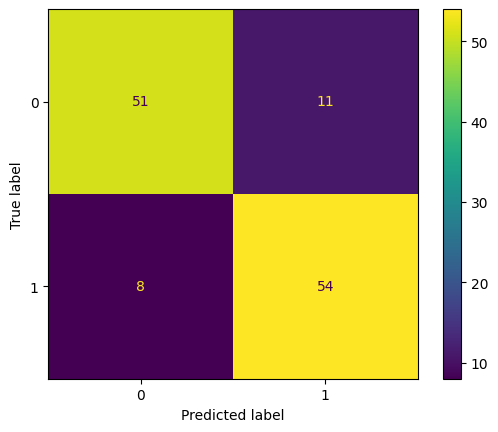

In [11]:
predictions = linear_classifier.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Polynomial kernel
For the SVM with an linear kernel, the hyperparameters we can work on are *C*, *gamma* and *degree*.

In [12]:
degree_range = np.arange(2, 10, 1)
C_range = np.logspace(-2, 10, 10, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)

param_grid = [{'C': C_range, 'gamma': gamma_range, 'degree': degree_range},
              {'C': C_range, 'degree': degree_range, 'gamma': ['auto', 'scale']}]

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'poly'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.25, 'degree': 2, 'gamma': 1.259921049894872} with a score of 0.97895


In [13]:
poly_classifier = grid.best_estimator_

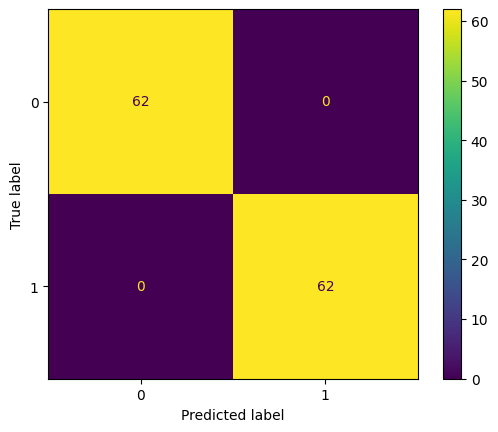

In [14]:
predictions = poly_classifier.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
After the model selection of SVC with different kind of kernels, we are going to select the best one.
Since a high C means that the model has a higer complexity (because of the SLT) and the risk is higher, we prefer to choose the SVM that uses polynomial as kernel, since C is low (and it means we have a low complexity due to the regularization). 

In [15]:
#Save the polynomial model
joblib.dump(poly_classifier, './results/monk1/SVM/poly_svm_monk1.z')

['./results/monk1/SVM/poly_svm_monk1.z']

### Model assesstment
After the selection phase we assess the generalization capabilities of the final model.

In [16]:
svm_monk1 = joblib.load('./results/monk1/SVM/poly_svm_monk1.z')

In [17]:
score1 = svm_monk1.score(x_monk1_ts, y_monk1_ts)

In [18]:
print("Final accuracy on the test set: " + str(score1))

Final accuracy on the test set: 1.0


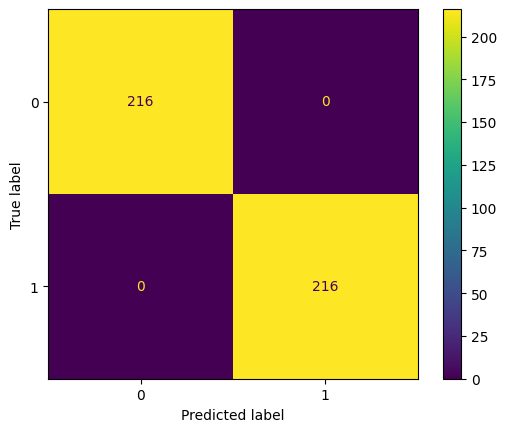

In [19]:
predictions = svm_monk1.predict(x_monk1_ts)

cm = confusion_matrix(y_monk1_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 2

In [20]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk2_tr = pd.read_csv("./dataset/monk2/monks-2.train", sep = " ", skipinitialspace=True, names = colnames)
monk2_tr = monk2_tr.drop('id', axis = 1)

monk2_ts = pd.read_csv("./dataset/monk2/monks-2.test", sep = " ", skipinitialspace=True, names = colnames)
monk2_ts = monk2_ts.drop('id', axis = 1)

In [21]:
x_monk2_tr = monk2_tr.iloc[:, 1:7].values
y_monk2_tr = monk2_tr.iloc[:, 0].values

x_monk2_ts = monk2_ts.iloc[:, 1:7].values
y_monk2_ts = monk2_ts.iloc[:, 0].values

In [22]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk2_tr)
x_monk2_tr = one_hot_encoder_tr.transform(x_monk2_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk2_ts)
x_monk2_ts = one_hot_encoder_ts.transform(x_monk2_ts)

### Grid search

#### RBF kernel
For the SVM with an RBF kernel, the hyperparameters we can work on are *C* and *gamma*.

In [23]:
C_range = np.logspace(-2, 10, 50, base = 2)
gamma_range = np.logspace(-9, 10, 50, base = 2)

param_grid = [{'C': C_range, 'gamma': gamma_range},
              {'C': C_range, 'gamma': ['auto', 'scale']}]

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'rbf'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1024.0, 'gamma': 0.021941347171432164} with a score of 0.76078


In [24]:
rbf_classifier = grid.best_estimator_

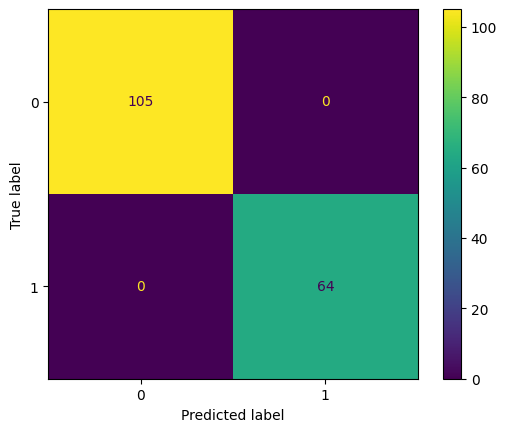

In [25]:
predictions = rbf_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Linear kernel
For the SVM with an linear kernel, the hyperparameter we can work on is *C*.

In [26]:
C_range = np.logspace(-2, 10, 100, base = 2)

param_grid = dict(
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'linear'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.2957447046849116} with a score of 0.60392


In [27]:
linear_classifier = grid.best_estimator_

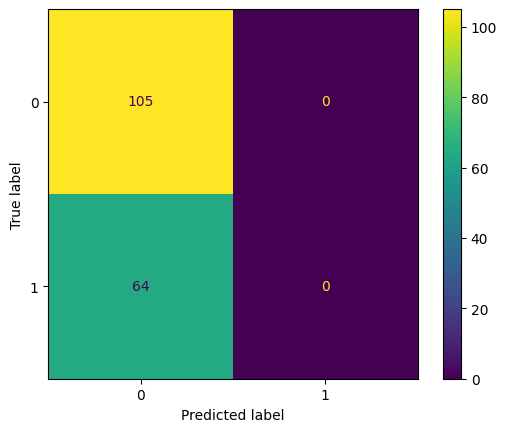

In [28]:
predictions = linear_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Polynomial kernel
For the SVM with an linear kernel, the hyperparameters we can work on are *C*, *gamma* and *degree*.

In [29]:
degree_range = np.arange(2, 10, 1)
C_range = np.logspace(-2, 10, 10, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)

param_grid = [{'C': C_range, 'gamma': gamma_range, 'degree': degree_range},
              {'C': C_range, 'degree': degree_range, 'gamma': ['auto', 'scale']}]

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'poly'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.25, 'degree': 2, 'gamma': 8.0} with a score of 0.83922


In [30]:
poly_classifier = grid.best_estimator_

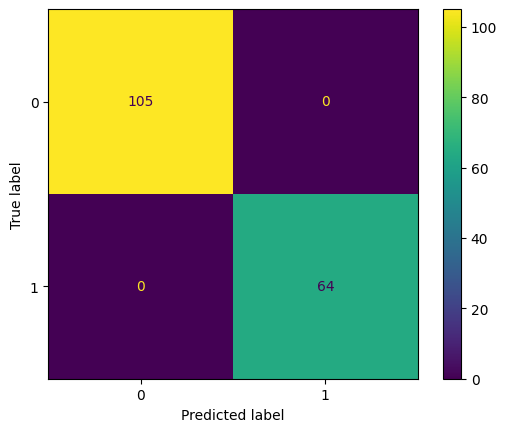

In [31]:
predictions = poly_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
After the model selection of SVC with different kind of kernels, we are going to select the best one.
Since a high C means that the model has a higer complexity (because of the SLT) and the risk is higher, we prefer to choose the SVM that uses polynomial as kernel, since C is low (and it means we have a low complexity due to the regularization).

In [32]:
#Save the polynomial model
joblib.dump(poly_classifier, './results/monk2/SVM/poly_svm_monk2.z')

['./results/monk2/SVM/poly_svm_monk2.z']

### Model assesstment
After the selection phase we assess the generalization capabilities of the final model.

In [33]:
svm_monk2 = joblib.load('./results/monk2/SVM/poly_svm_monk2.z')

In [34]:
score2 = svm_monk2.score(x_monk2_ts, y_monk2_ts)

In [35]:
print("Final accuracy on the test set: " + str(score2))

Final accuracy on the test set: 1.0


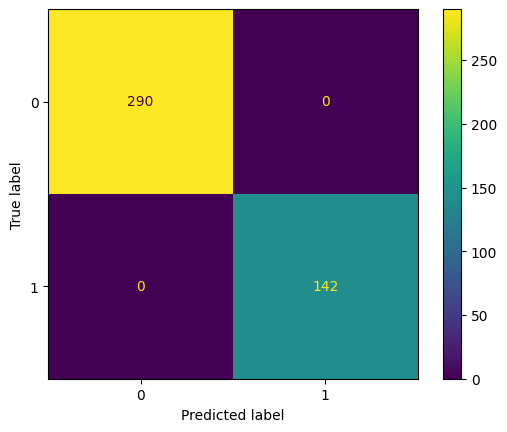

In [36]:
predictions = svm_monk2.predict(x_monk2_ts)

cm = confusion_matrix(y_monk2_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 3

In [37]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk3_tr = pd.read_csv("./dataset/monk3/monks-3.train", sep = " ", skipinitialspace=True, names = colnames)
monk3_tr = monk3_tr.drop('id', axis = 1)

monk3_ts = pd.read_csv("./dataset/monk3/monks-3.test", sep = " ", skipinitialspace=True, names = colnames)
monk3_ts = monk3_ts.drop('id', axis = 1)

In [38]:
x_monk3_tr = monk3_tr.iloc[:, 1:7].values
y_monk3_tr = monk3_tr.iloc[:, 0].values

x_monk3_ts = monk3_ts.iloc[:, 1:7].values
y_monk3_ts = monk3_ts.iloc[:, 0].values

In [39]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk3_tr)
x_monk3_tr = one_hot_encoder_tr.transform(x_monk3_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk3_ts)
x_monk3_ts = one_hot_encoder_ts.transform(x_monk3_ts)

### Grid search

#### RBF kernel
For the SVM with an RBF kernel, the hyperparameters we can work on are *C* and *gamma*.

In [40]:
C_range = np.logspace(-2, 5, 30, base = 2)
gamma_range = np.logspace(-9, 3, 30, base = 2)

param_grid = [{'C': C_range, 'gamma': gamma_range},
              {'C': C_range, 'gamma': ['auto', 'scale']}]

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'rbf'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.953321330946634, 'gamma': 0.08129499502225035} with a score of 0.92973


In [41]:
rbf_classifier = grid.best_estimator_

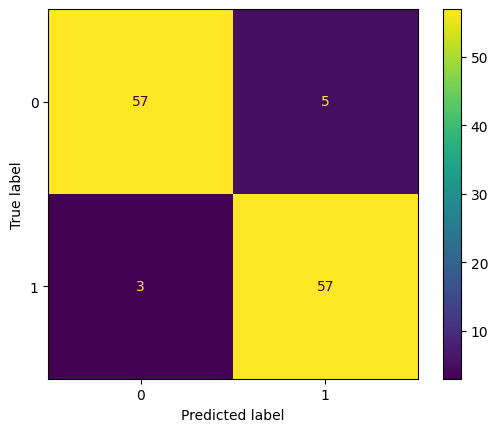

In [42]:
predictions = rbf_classifier.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Linear kernel
For the SVM with an linear kernel, the hyperparameter we can work on is *C*.

In [43]:
C_range = np.logspace(-2, 10, 100, base = 2)

param_grid = dict(
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'linear'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.25} with a score of 0.91892


In [44]:
linear_classifier = grid.best_estimator_

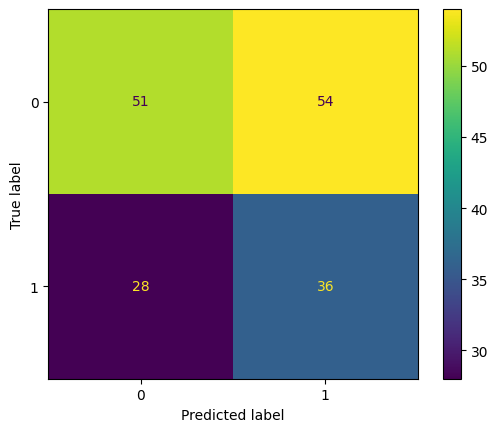

In [45]:
predictions = linear_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Polynomial kernel
For the SVM with an linear kernel, the hyperparameters we can work on are *C*, *gamma* and *degree*.

In [46]:
degree_range = np.arange(2, 10, 1)
C_range = np.logspace(-2, 10, 10, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)

param_grid = [{'C': C_range, 'gamma': gamma_range, 'degree': degree_range},
              {'C': C_range, 'degree': degree_range, 'gamma': ['auto', 'scale']}]

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'poly'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    n_jobs = -1
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.25, 'degree': 2, 'gamma': 0.5} with a score of 0.96757


In [47]:
poly_classifier = grid.best_estimator_

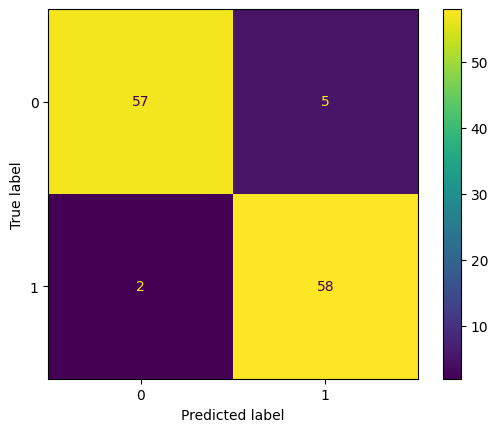

In [48]:
predictions = poly_classifier.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
After the model selection of SVC with different kind of kernels, we are going to select the best one.
Since a high C means that the model has a higer complexity (because of the SLT) and the risk is higher, we prefer to choose the SVM that uses polynomial as kernel, since C is low (and it means we have a low complexity due to the regularization).

In [49]:
#Save the rbf model
joblib.dump(poly_classifier, './results/monk3/SVM/poly_svm_monk3.z')

['./results/monk3/SVM/poly_svm_monk3.z']

### Model assessment
After the selection phase we assess the generalization capabilities of the final model.

In [50]:
svm_monk3 = joblib.load('./results/monk3/SVM/poly_svm_monk3.z')

In [51]:
score3 = svm_monk3.score(x_monk3_ts, y_monk3_ts)

In [52]:
print("Final accuracy on the test set: " + str(score3))

Final accuracy on the test set: 0.9768518518518519


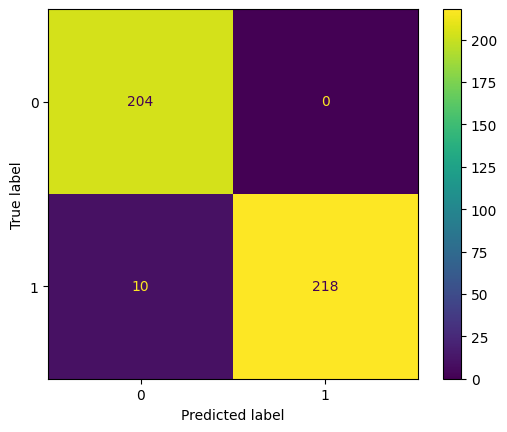

In [53]:
predictions = svm_monk3.predict(x_monk3_ts)

cm = confusion_matrix(y_monk3_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()